# Explore here

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import seaborn as sns


df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [85]:
#Vamos a ver si hay valores nulos

df.isnull().sum()



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [86]:
# eliminamos duplicados. Parece que había un duplicado. 
df = df.drop_duplicates().reset_index (drop = True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [87]:
# Descripción inicial de las columnas que son númericas

f.describe().T

NameError: name 'f' is not defined

In [5]:
# Miramos los valores únicos. 
df.nunique()

#viendo los resultados solamente vamos a tener que trabajar un poco más la columna region porque los otros valores no numéricos tienes 2 posibilidades

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7797460cff40>,
 'caps': [<matplotlib.lines.Line2D at 0x779743efc580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7797460cfbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x779743efcb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x779743efce80>],
 'means': []}

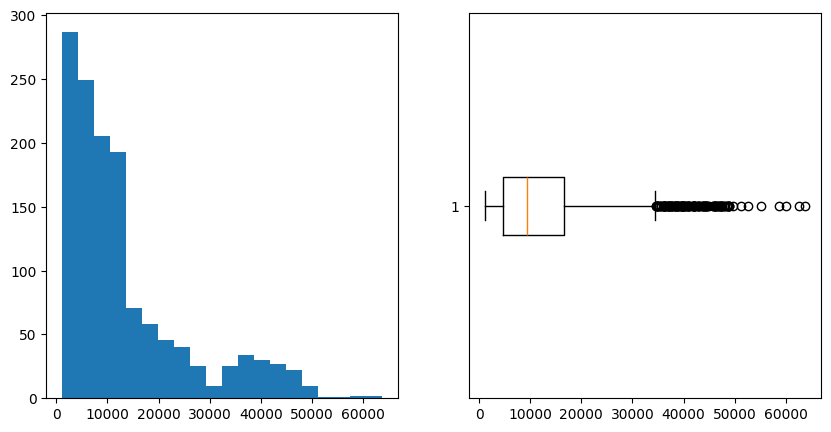

In [ ]:
# dibujamos la variable independiente para entender la distribución 

fig, ax= plt.subplots (1,2, figsize = (10,5))
ax[0].hist(df['charges'], bins =20)
ax[1].boxplot(df['charges'], vert = False)



{'whiskers': [<matplotlib.lines.Line2D at 0x779743db42e0>,
 'caps': [<matplotlib.lines.Line2D at 0x779743db48e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x779743d83fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x779743db4ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x779743db51e0>],
 'means': []}

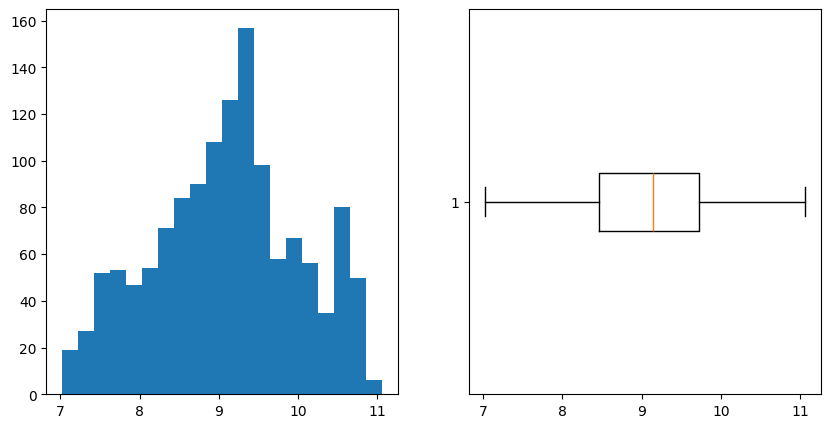

In [11]:
# vamos a ver si podemos mejorar trabajando con el log de la variable 

fig, ax= plt.subplots (1,2, figsize = (10,5))
ax[0].hist(np.log(df['charges']), bins =20)
ax[1].boxplot(np.log(df['charges']), vert = False)

In [14]:
# como nos ha convencido. creamos la columna log 

df['log_charges']= np.log(df['charges'])

df['log_charges'].describe().T

# no hay valores extremos 

count    1338.000000
mean        9.098659
std         0.919527
min         7.022756
25%         8.463853
50%         9.146552
75%         9.719558
max        11.063045
Name: log_charges, dtype: float64

In [ ]:
# pasamos a ver valores influyentes 

X = df.drop(['charges','log_charges','sex','smoker','region'], axis=1)
y = df['log_charges']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

cooks_distance = model.get_influence().cooks_distance


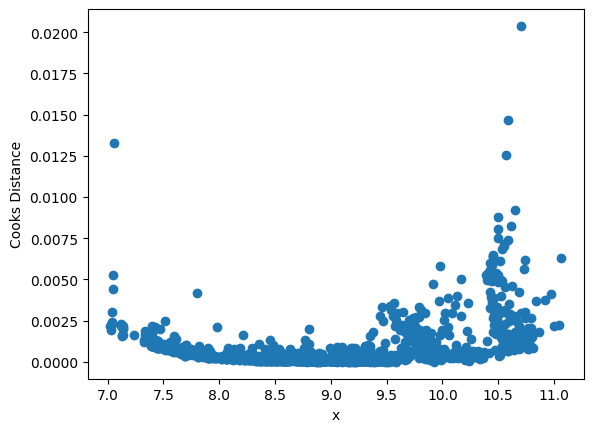

In [19]:
plt.scatter(df['log_charges'], cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# vamos a eliminar ahora los valores influyentes
pto_corte = 4/len(df)
len(np.where(cooks_distance[0]>pto_corte)[0])


In [23]:
df1 = df.drop(np.where(cooks_distance[0]>pto_corte)[0])


,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,7.604867


In [45]:
# coinvertimos las variables en numéricas. Vamos a usar, esta ve la función de pandas factorize() en lugar de labelencoder

df1['sex_n'] = pd.factorize(df1['sex'])[0]
df1['smoker_n'] = pd.factorize(df1['smoker'])[0]
df1['region_n'] = pd.factorize(df1['region'])[0]

df1['smoker_n'] = df1['smoker_n'].map({1:0,0:1})


df1

,age,sex,bmi,children,smoker,region,charges,log_charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,7.453302,1,0,1
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,1,0,1
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,1,0,2
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268661,1,0,2
1334,18,female,31.920,0,no,northeast,2205.98080,7.698927,0,0,3
1335,18,female,36.850,0,no,southeast,1629.83350,7.396233,0,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,7.604867,0,0,0


In [47]:
X = df1.drop(['charges','log_charges','sex','smoker','region'], axis=1)
y = df1['log_charges']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp


,Feature,Importance
4,smoker_n,87.043266
0,age,6.304453
2,children,3.005257
5,region_n,1.377093
1,bmi,1.212176
3,sex_n,1.057753


In [49]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

age         1.117101
bmi         1.239277
children    1.009352
sex_n       1.050923
smoker_n    1.099146
region_n    1.128746
dtype: float64

vemos que los valores no son grandes por lo que no tendría sentido cambiar o eliminar variables a este respecto

<Axes: >

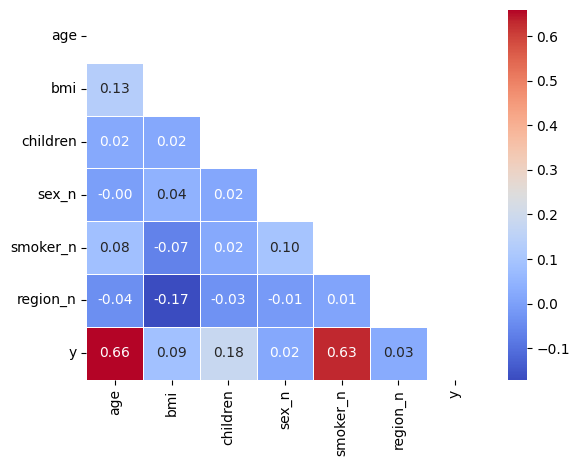

In [ ]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [71]:
binary_cols = ['sex_n','smoker_n']

X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [72]:
#instanciamos el modelo de escalado solamente con el grupo train para evitar influencias sobre el grupo test
scaler=MinMaxScaler().fit(X_train_num)

In [73]:
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [74]:
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [79]:
# concatenamos porque los resultados del escaler es un array solamente con los valores

X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [82]:
y_train

35      7.393530
166     8.482732
762     9.854343
1010    9.020274
296     9.698788
          ...   
1099    8.079346
1153    8.635946
1190    8.580619
906     8.486099
1185    9.059962
Name: log_charges, Length: 1013, dtype: float64

In [81]:
X_train_sc

,age,bmi,children,region_n,sex_n,smoker_n
0,0.021739,0.134894,0.0,0.666667,1,0
1,0.043478,0.635650,1.0,0.000000,0,0
2,0.326087,0.336556,0.2,0.000000,1,1
3,0.652174,0.206647,0.0,0.000000,0,0
4,0.021739,0.354683,0.0,0.000000,1,1
...,...,...,...,...,...,...
1008,0.152174,0.544713,0.2,0.333333,0,0
1009,0.369565,0.599849,0.2,0.666667,0,0
1010,0.282609,0.508006,0.4,0.666667,0,0
1011,0.195652,0.502266,0.6,1.000000,1,0


In [91]:
# Con los datos seleccionados ye escalados, pasamos a aplicar el modelo de regresión lineal

modelo = LinearRegression()
modelo.fit(X_train_sc, y_train)

LinearRegression()

In [92]:
print (modelo.intercept_)
print(modelo.coef_)

# podemos ver el intercepto del modelo y los coeficientes que acompañarían a cada una de las 4 variables independientes que hemos considerado. 


7.68756998696584
[ 1.76760274  0.25942388  0.56747818  0.13644995 -0.0685893   1.37438695]


In [96]:
y_pred = modelo.predict(X_test_sc)
y_pred

array([ 8.09089917,  9.51022788,  9.31467634,  8.16432011,  9.572758  ,
        9.06767486,  8.76159577,  8.05949514,  8.22896345,  8.80315143,
       10.77485426,  7.69455696,  7.74668734,  9.08802107,  9.53321873,
        8.97999623,  8.37186804,  9.5833592 ,  9.0037661 ,  8.52251193,
        8.08669986,  9.41542655,  8.63402699,  8.01553602,  9.40802604,
        9.60493609,  9.06185074, 10.02636116,  8.46191779,  8.73764827,
        8.01638811,  8.56316362,  9.14328983,  9.233397  ,  9.48213922,
        9.09191164,  8.64763219,  9.75276646,  9.23280652,  7.7623625 ,
        9.36067524,  8.72530413,  9.30444682,  9.25500936,  7.93088199,
        8.74997632,  8.7692569 ,  9.03412884,  8.53413655,  9.4733443 ,
        7.96574686,  8.36124526,  7.9017549 ,  8.55583282,  8.75764597,
        7.8566676 ,  9.00598263,  9.44184142,  9.06417114,  7.80962011,
        9.07248897,  9.42675352, 10.7141235 ,  7.74041728,  9.02353763,
        9.51632358, 10.77067449,  8.45409173, 10.19125366,  9.54

In [97]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")




MSE: 0.1453144748881626
R2 Score: 0.8132516942650474


 vemos que el modelo tiene un error cuadrático medio de 0.14 y que explicaría el 81,3% de la variabilidad de los datos. 
